Laboratory 4 - CNN Data Augmentation (part two)
Aleksandra Tereszkiewicz

In this part I tested a different dataset.

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/KCiDMB

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KCiDMB


In [ ]:
import matplotlib.pyplot as plt

def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

##My Dataset

I used a dataset from kaggle: https://www.kaggle.com/datasets/sujaykapadnis/smoking/data

It contains 1120 pictures divided into 2 classes of smokers and non-smokers.

In [ ]:
train_path = 'smoke/Training/Training'
test_path = 'smoke/Testing/Testing'
paths = [train_path, test_path]

for path in paths:
    print(path)
    if not os.path.exists(os.path.join(path, 'Smoking')):
        os.makedirs(os.path.join(path, 'Smoking'))
    if not os.path.exists(os.path.join(path, 'NotSmoking')):
        os.makedirs(os.path.join(path, 'NotSmoking'))
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path, i)):
            if i[:7] == 'smoking':
                os.rename(os.path.join(path, i), os.path.join(path, 'Smoking', i))
            else:
                os.rename(os.path.join(path, i), os.path.join(path, 'NotSmoking', i))

smoke/Training/Training
smoke/Testing/Testing


In [ ]:
#first I divided data into training and testing sets

train_datagen = ImageDataGenerator(rescale = 1./255,
                    shear_range=0.3,
                    zoom_range = 0.2,
                    horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode="binary")

test_datagen = ImageDataGenerator(rescale = 1./255)

testing_set = test_datagen.flow_from_directory(test_path,
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode = "binary")

Found 716 images belonging to 2 classes.
Found 224 images belonging to 2 classes.


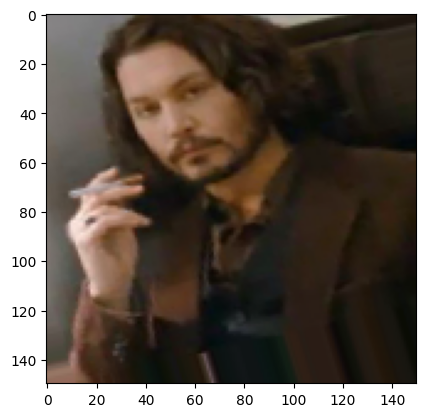

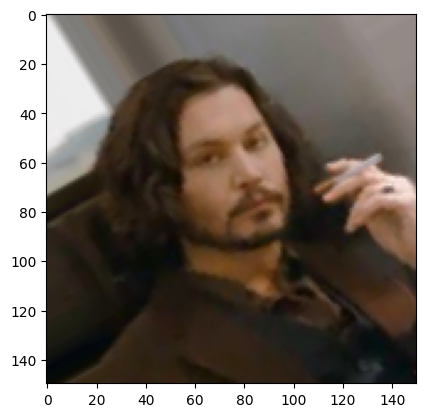

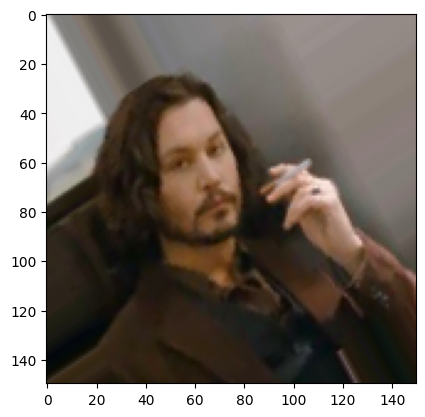

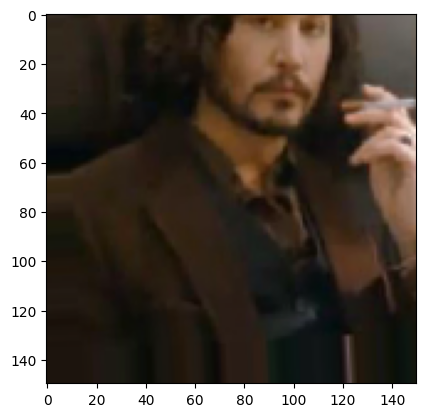

In [ ]:
#here i presented an example image from smoking class

img_rows = 150
img_cols = 150

datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

fnames = [os.path.join('smoke/Training/Training/Smoking', fname) for fname in os.listdir('smoke/Training/Training/Smoking')]

img_path = fnames[11]
img = image.load_img(img_path, target_size=(img_rows, img_cols))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

###Model nr 1

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


In [ ]:
history = model.fit(x = training_set,
                    validation_data=testing_set,
                    epochs = 20)

Epoch 1/20
23/23 [==============================] - 237s 10s/step - loss: 0.6902 - acc: 0.4972 - val_loss: 0.6851 - val_acc: 0.5000
Epoch 2/20
23/23 [==============================] - 8s 342ms/step - loss: 0.6787 - acc: 0.5321 - val_loss: 0.6804 - val_acc: 0.6339
Epoch 3/20
23/23 [==============================] - 9s 387ms/step - loss: 0.6746 - acc: 0.5573 - val_loss: 0.6685 - val_acc: 0.6027
Epoch 4/20
23/23 [==============================] - 9s 380ms/step - loss: 0.6611 - acc: 0.5950 - val_loss: 0.6508 - val_acc: 0.6473
Epoch 5/20
23/23 [==============================] - 8s 350ms/step - loss: 0.6376 - acc: 0.6466 - val_loss: 0.6344 - val_acc: 0.6116
Epoch 6/20
23/23 [==============================] - 8s 337ms/step - loss: 0.6228 - acc: 0.6830 - val_loss: 0.6221 - val_acc: 0.6250
Epoch 7/20
23/23 [==============================] - 9s 395ms/step - loss: 0.6057 - acc: 0.6899 - val_loss: 0.6224 - val_acc: 0.6250
Epoch 8/20
23/23 [==============================] - 9s 369ms/step - loss: 0.

<Figure size 640x480 with 0 Axes>

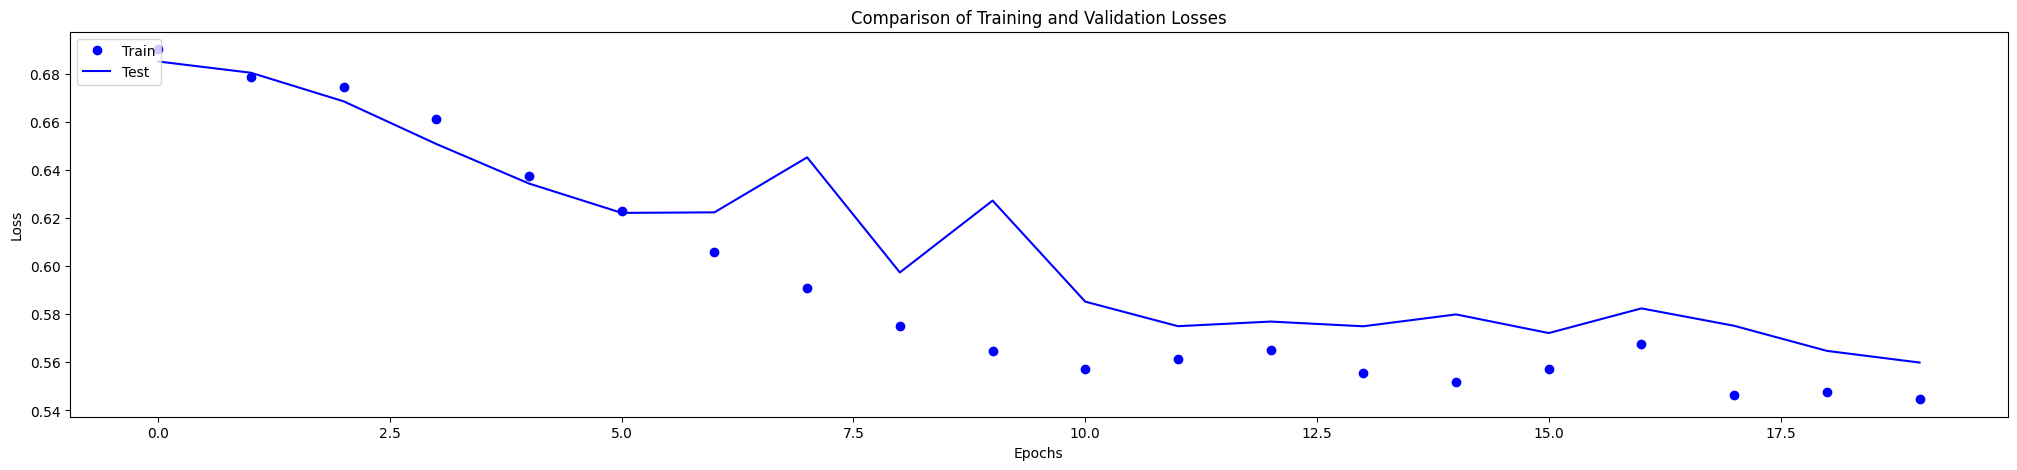

<Figure size 640x480 with 0 Axes>

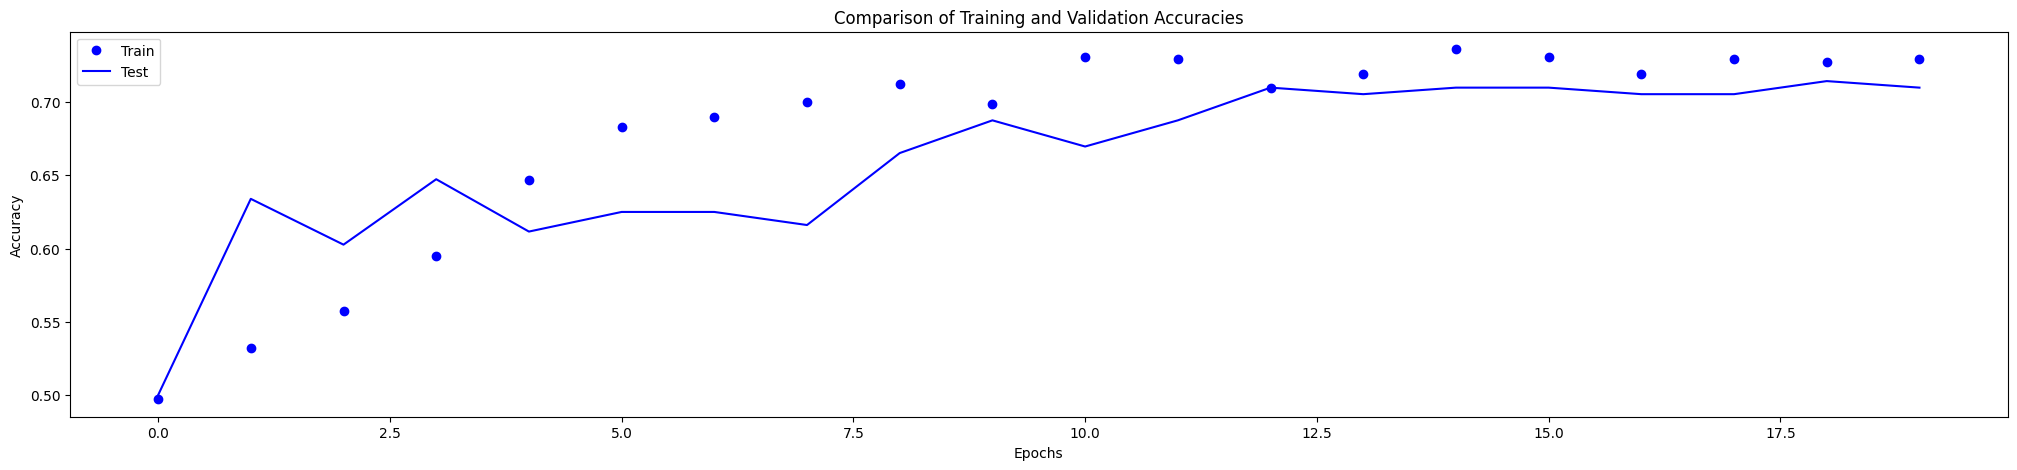

Max accuracy for this model is:  0.7142857313156128 , achieved in the  18 epoch.
Min loss for this model is:  0.5599076151847839 , achieved in the  19 epoch.


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
PlotLossComparison(loss, val_loss, 'Model')

acc = history.history['acc']
val_acc = history.history['val_acc']
PlotAccuracyComparison(acc, val_acc, 'Model')

argmax = np.argmax(val_acc)
argmin = np.argmin(val_loss)
print ('Max accuracy for this model is: ', val_acc[argmax], ', achieved in the ', argmax , 'epoch.')
print ('Min loss for this model is: ', val_loss[argmin], ', achieved in the ', argmin , 'epoch.')

Here I used the same model as the one with highest accuracy from PetImages training. It is a sizeble model with multiple convolutional layers and many filters.

 It performed quite well - at 71% accuracy. But the model was only trained for 20 epochs and appeared to be able to learn more.

##Model nr 2

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])


In [ ]:
history = model.fit(x = training_set,
                    validation_data=testing_set,
                    epochs = 50)

Epoch 1/50
23/23 [==============================] - 14s 383ms/step - loss: 0.6850 - acc: 0.5098 - val_loss: 0.6837 - val_acc: 0.5000
Epoch 2/50
23/23 [==============================] - 9s 392ms/step - loss: 0.6779 - acc: 0.5279 - val_loss: 0.6643 - val_acc: 0.6116
Epoch 3/50
23/23 [==============================] - 9s 378ms/step - loss: 0.6572 - acc: 0.6187 - val_loss: 0.6281 - val_acc: 0.6250
Epoch 4/50
23/23 [==============================] - 8s 349ms/step - loss: 0.6124 - acc: 0.6494 - val_loss: 0.5990 - val_acc: 0.6652
Epoch 5/50
23/23 [==============================] - 9s 396ms/step - loss: 0.5777 - acc: 0.7053 - val_loss: 0.5975 - val_acc: 0.6562
Epoch 6/50
23/23 [==============================] - 9s 376ms/step - loss: 0.5838 - acc: 0.6872 - val_loss: 0.5934 - val_acc: 0.7143
Epoch 7/50
23/23 [==============================] - 8s 358ms/step - loss: 0.5702 - acc: 0.7165 - val_loss: 0.5842 - val_acc: 0.6786
Epoch 8/50
23/23 [==============================] - 10s 437ms/step - loss: 

<Figure size 640x480 with 0 Axes>

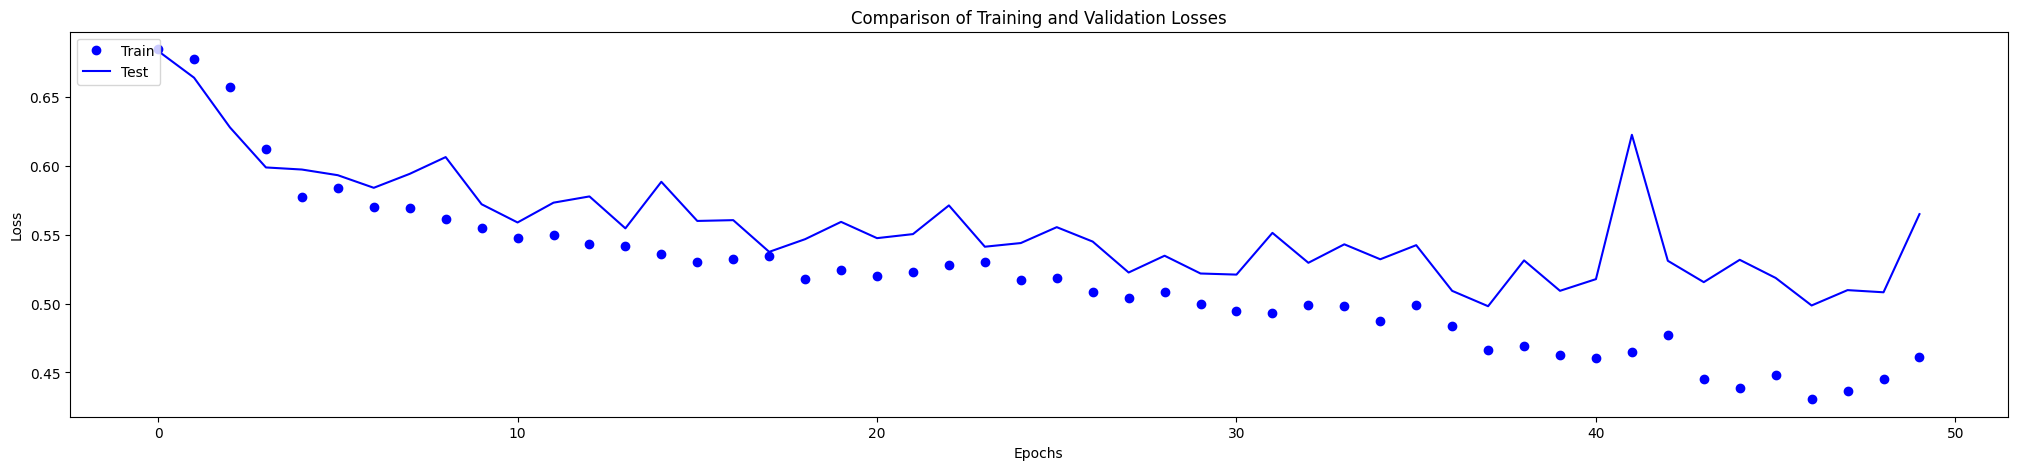

<Figure size 640x480 with 0 Axes>

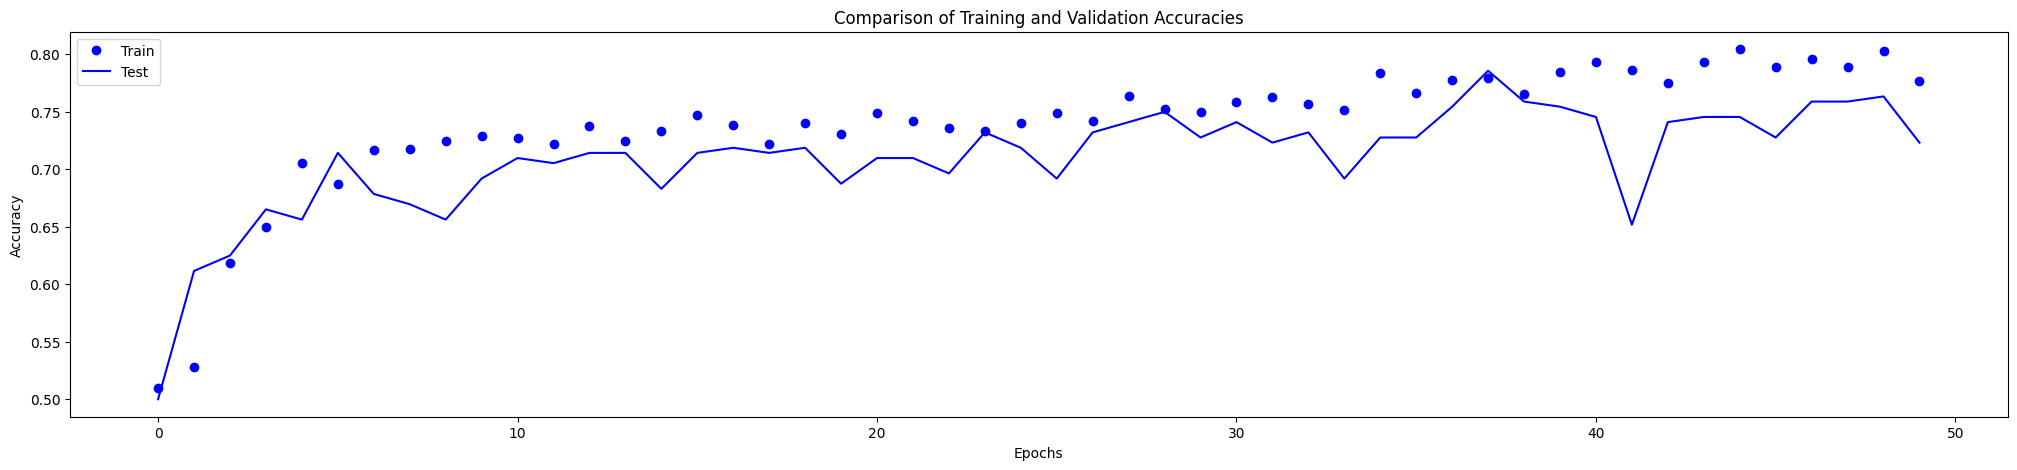

Max accuracy for this model is:  0.7857142686843872 , achieved in the  37 epoch.
Min loss for this model is:  0.4981558620929718 , achieved in the  37 epoch.


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
PlotLossComparison(loss, val_loss, 'Model')

acc = history.history['acc']
val_acc = history.history['val_acc']
PlotAccuracyComparison(acc, val_acc, 'Model')

argmax = np.argmax(val_acc)
argmin = np.argmin(val_loss)
print ('Max accuracy for this model is: ', val_acc[argmax], ', achieved in the ', argmax , 'epoch.')
print ('Min loss for this model is: ', val_loss[argmin], ', achieved in the ', argmin , 'epoch.')

This model performed much better. I changed model optimizer to Adam and trained it for 50 epochs. The highest accuracy of 79% was achieved in 37th epoch and then some overfitting was present.

##Model nr 3

In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.005), activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 72, 72, 256)       147712    
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 36, 36, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 36, 36, 256)      

In [ ]:
history = model.fit(x = training_set,
                    validation_data=testing_set,
                    epochs = 40)

Epoch 1/40
23/23 [==============================] - 12s 377ms/step - loss: 5.2842 - acc: 0.4804 - val_loss: 5.2170 - val_acc: 0.5000
Epoch 2/40
23/23 [==============================] - 9s 375ms/step - loss: 5.1630 - acc: 0.5070 - val_loss: 5.1097 - val_acc: 0.5938
Epoch 3/40
23/23 [==============================] - 9s 388ms/step - loss: 5.0507 - acc: 0.5112 - val_loss: 4.9974 - val_acc: 0.5268
Epoch 4/40
23/23 [==============================] - 9s 381ms/step - loss: 4.9446 - acc: 0.5642 - val_loss: 4.8875 - val_acc: 0.5759
Epoch 5/40
23/23 [==============================] - 10s 424ms/step - loss: 4.8281 - acc: 0.5838 - val_loss: 4.7665 - val_acc: 0.5893
Epoch 6/40
23/23 [==============================] - 11s 484ms/step - loss: 4.6992 - acc: 0.6508 - val_loss: 4.6401 - val_acc: 0.7143
Epoch 7/40
23/23 [==============================] - 11s 473ms/step - loss: 4.5646 - acc: 0.6858 - val_loss: 4.5182 - val_acc: 0.6518
Epoch 8/40
23/23 [==============================] - 10s 439ms/step - los

<Figure size 640x480 with 0 Axes>

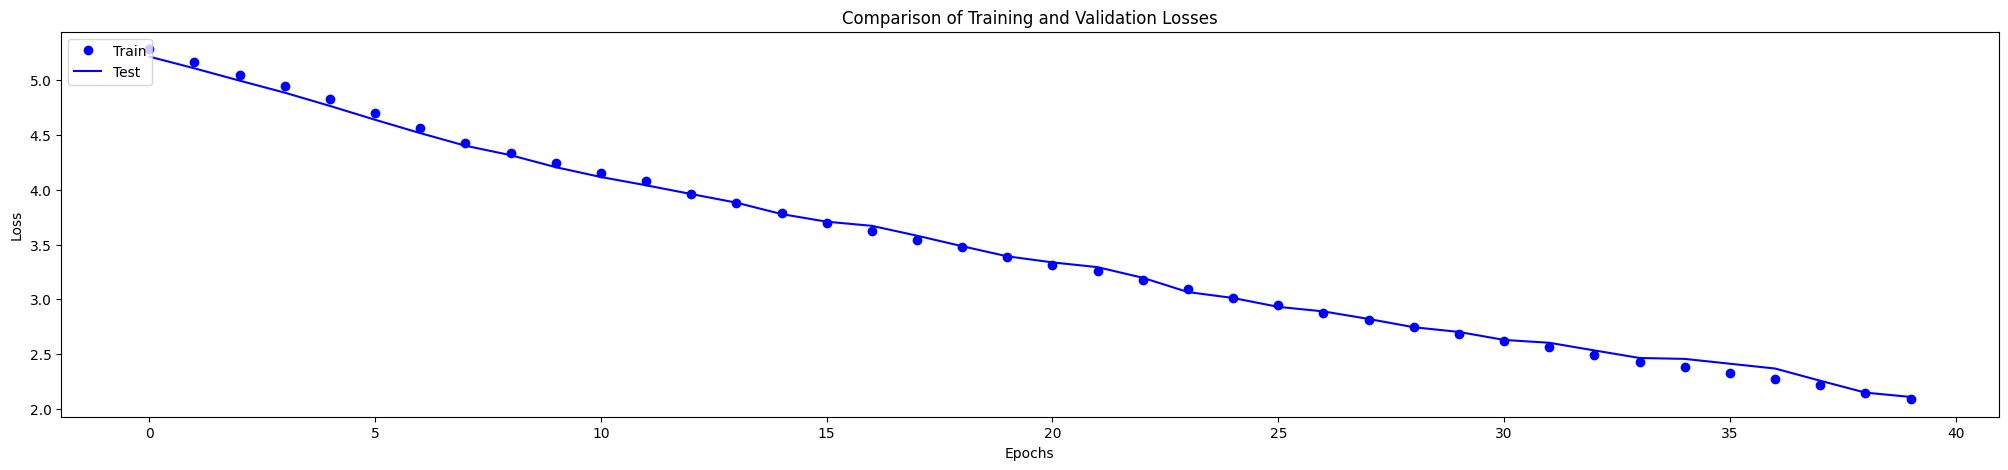

<Figure size 640x480 with 0 Axes>

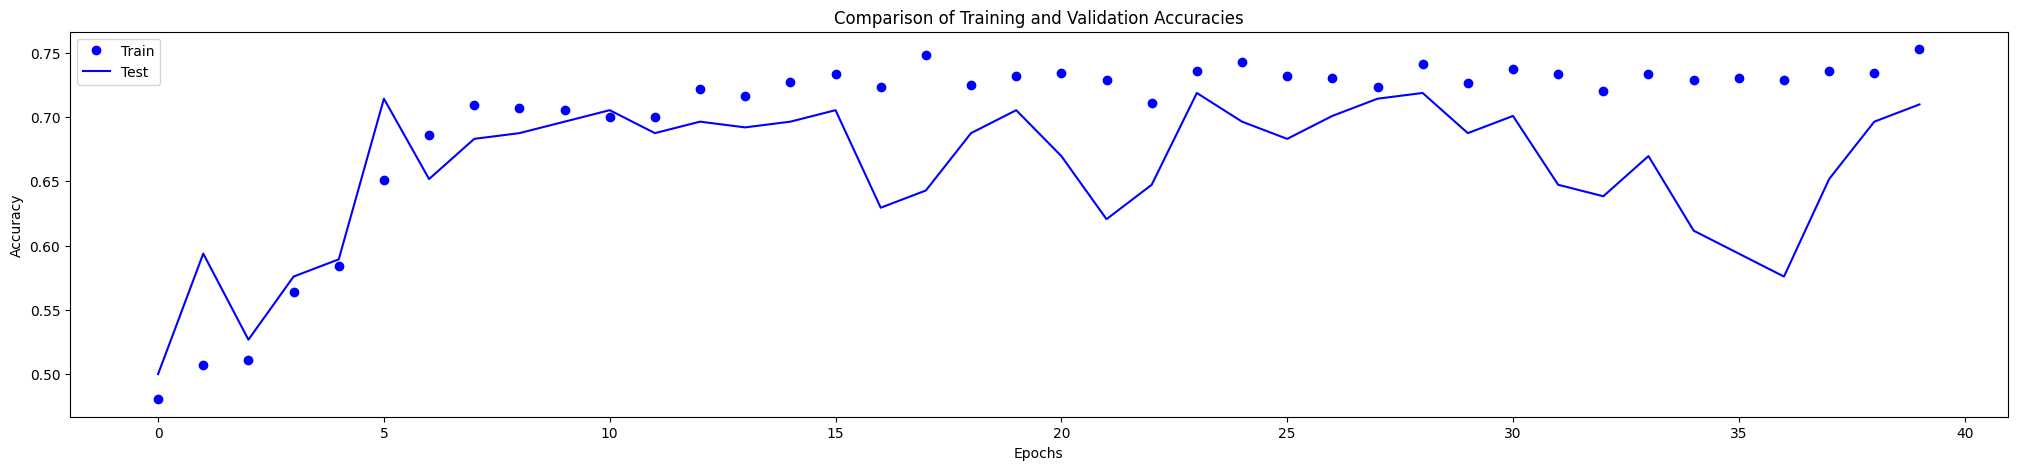

Max accuracy for this model is:  0.71875 , achieved in the  23 epoch.
Min loss for this model is:  2.1087753772735596 , achieved in the  39 epoch.


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
PlotLossComparison(loss, val_loss, 'Model')

acc = history.history['acc']
val_acc = history.history['val_acc']
PlotAccuracyComparison(acc, val_acc, 'Model')

argmax = np.argmax(val_acc)
argmin = np.argmin(val_loss)
print ('Max accuracy for this model is: ', val_acc[argmax], ', achieved in the ', argmax , 'epoch.')
print ('Min loss for this model is: ', val_loss[argmin], ', achieved in the ', argmin , 'epoch.')

In this model I tried to prevent overfitting so I used L1 weight regularization and higher dropout rate. I also trained the model for 40 epochs because previously 40th epoch was the start of overfitting.

Unfortunately those modifications didn't work and the model performed worse: 72% accuracy and high loss.

I presume it might be caused by the fact that chosen dataset is complicated and model represents this variability only with high weight values. In such case L1 regularization (which penalizes high weights) may decrease model's ability to fit data and harm its performance.

Another explanation is that overfitting wasn't as big to begin with so attempts at regularizing it didn't work.

In this notebook I learned how to correctly preprocess data and perform data augmentation and how to change model hyperparameters to fit data better. I also learned how different number of training data influences model accuracy and performance.